In [10]:
import psycopg2
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [11]:
from config import hostname, database, username, password, port_id

In [12]:
try:
    conn = psycopg2.connect(
        host = hostname,
        dbname = database,
        user = username,
        password = password,
        port = port_id)
    print("Connected to the database!")

except Exception as e:
    print(f"Unable to connect to the database. Error: {e}")


Connected to the database!


In [13]:
# example query to grab all of the columns
sql_query = "SELECT * FROM general_info_final"
df = pd.read_sql_query(sql_query, conn)
df.head()


C:\Users\nikit\AppData\Local\Temp\ipykernel_3444\1257235203.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


,Unnamed: 0,ID,STATE,GENDER,INCOME,WEIGHT,BMI,RACE,AGE,DIABETES,...,PERSONAL_DOC,CHECKUP1,HRT_ATTACK,HRT_DISEASE,STROKE,ARTHRITIS,_SMOKER3,DIFFWALK,EDUCATION,HEIGHT
0,1,1,1.0,FEMALE,3.0,6804.0,Over_Weight,White,13.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,Never,0.0,Grad_HS_Y,63.0
1,2,2,1.0,FEMALE,6.0,6350.0,Over_Weight,White,8.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,Never,0.0,College_Y,62.0
2,4,4,1.0,FEMALE,3.0,5398.0,Normal_Weight,White,5.0,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,Never,0.0,College_N,62.0
3,6,6,1.0,FEMALE,5.0,6260.0,Normal_Weight,Black,13.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,Prev_Smoker,0.0,College_Y,65.0
4,7,7,1.0,FEMALE,5.0,7348.0,Over_Weight,White,13.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,Never,0.0,Grad_HS_Y,64.0


In [15]:
df = df.drop(columns = ["Unnamed: 0"])

In [16]:
# Convert categorical data to numeric with `pd.get_dummies`
df_dummies = pd.get_dummies(df)
df_dummies.head()

,ID,STATE,INCOME,WEIGHT,AGE,DIABETES,PHYSHLTH,MENTHLTH,EXERCISE,SLEEP,...,RACE_Multiracial,RACE_White,_SMOKER3_Never,_SMOKER3_Prev_Smoker,_SMOKER3_Smok_daily_N,_SMOKER3_Smok_daily_Y,EDUCATION_College_N,EDUCATION_College_Y,EDUCATION_Grad_HS_N,EDUCATION_Grad_HS_Y
0,1,1.0,3.0,6804.0,13.0,0.0,0.0,0.0,0.0,6.0,...,0,1,1,0,0,0,0,0,0,1
1,2,1.0,6.0,6350.0,8.0,0.0,2.0,3.0,1.0,5.0,...,0,1,1,0,0,0,0,1,0,0
2,4,1.0,3.0,5398.0,5.0,0.0,2.0,0.0,1.0,9.0,...,0,1,1,0,0,0,1,0,0,0
3,6,1.0,5.0,6260.0,13.0,0.0,0.0,0.0,1.0,7.0,...,0,0,0,1,0,0,0,1,0,0
4,7,1.0,5.0,7348.0,13.0,0.0,0.0,0.0,0.0,8.0,...,0,1,1,0,0,0,0,0,0,1


In [18]:
df.dtypes

ID                 int64
STATE            float64
GENDER            object
INCOME           float64
WEIGHT           float64
BMI               object
RACE              object
AGE              float64
DIABETES         float64
PHYSHLTH         float64
MENTHLTH         float64
EXERCISE         float64
SLEEP            float64
HLT_INSURANCE    float64
PERSONAL_DOC     float64
CHECKUP1         float64
HRT_ATTACK       float64
HRT_DISEASE      float64
STROKE           float64
ARTHRITIS        float64
_SMOKER3          object
DIFFWALK         float64
EDUCATION         object
HEIGHT           float64
dtype: object

In [24]:
# retrieve all labels that are categorical and store in a list
cat_df = df.select_dtypes(include=['object'])
cat_col = list(cat_df.columns.values)

# retrieve all labels that are Numerical
num_df = df.select_dtypes(include=['float64'])
num_col =  list(num_df.columns.values)

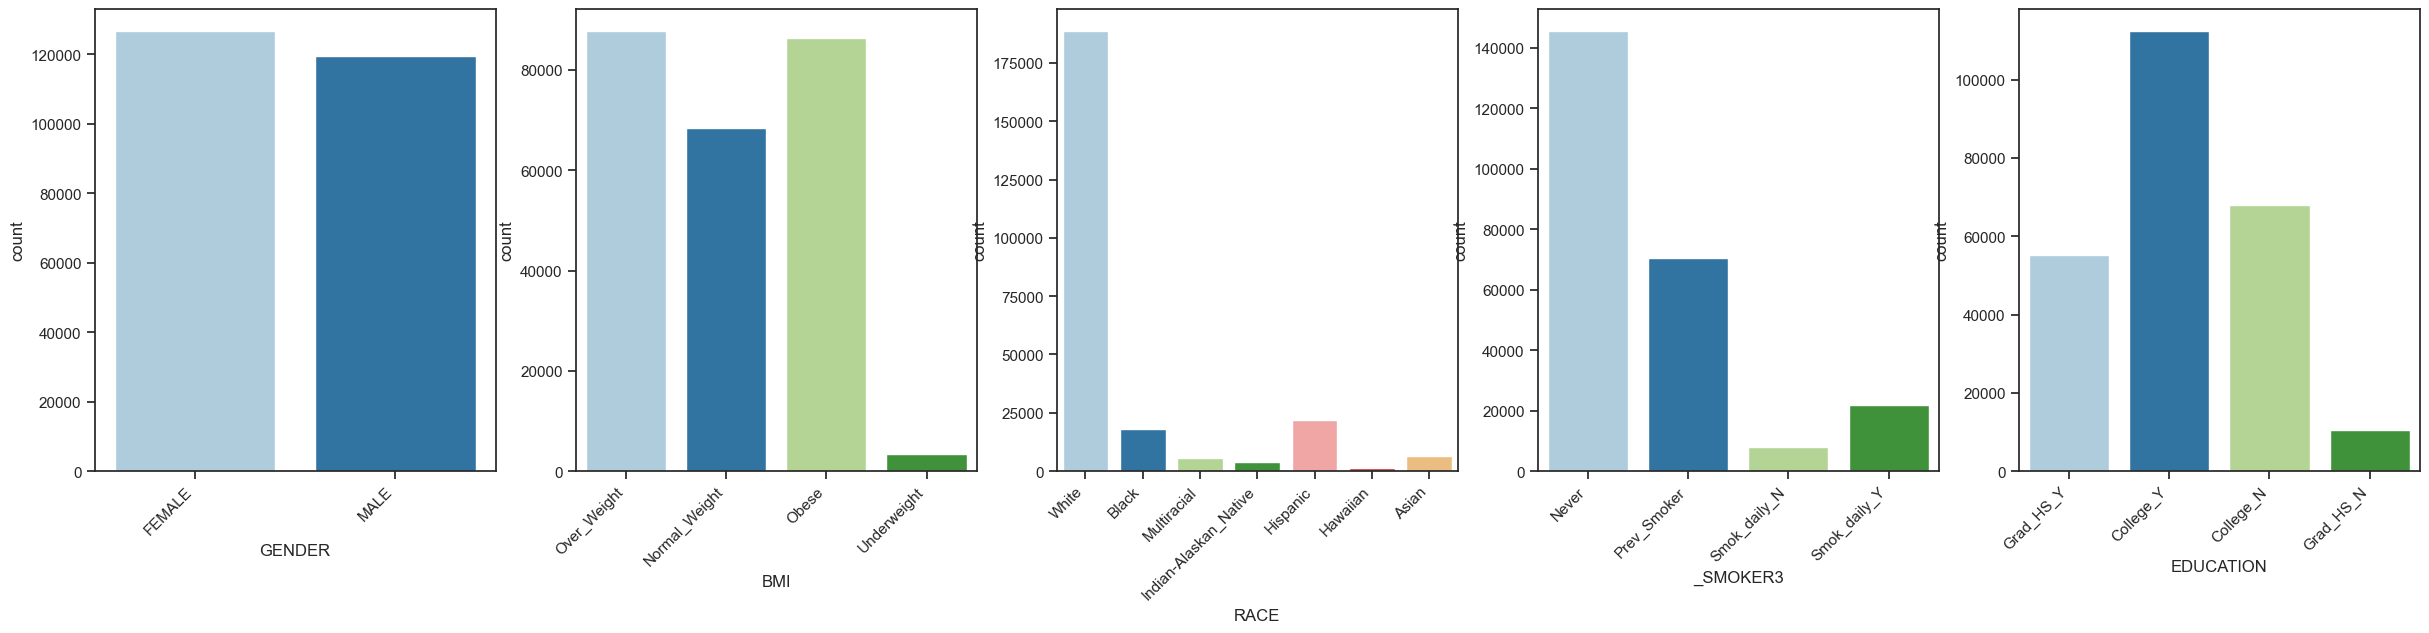

In [30]:
# Univariate visualization of categorical features

def univariate_analysis():
  i = 1
  plt.figure(figsize = (30,6))
  for column in cat_col:
      plt.subplot(1,5,i)
      sns.set(palette='Paired')
      sns.set_style("ticks")
      ax = sns.countplot(x = column, data = df)#, hue = 'Stroke')#, color='#221C35') 
      ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
      i +=1

univariate_analysis()

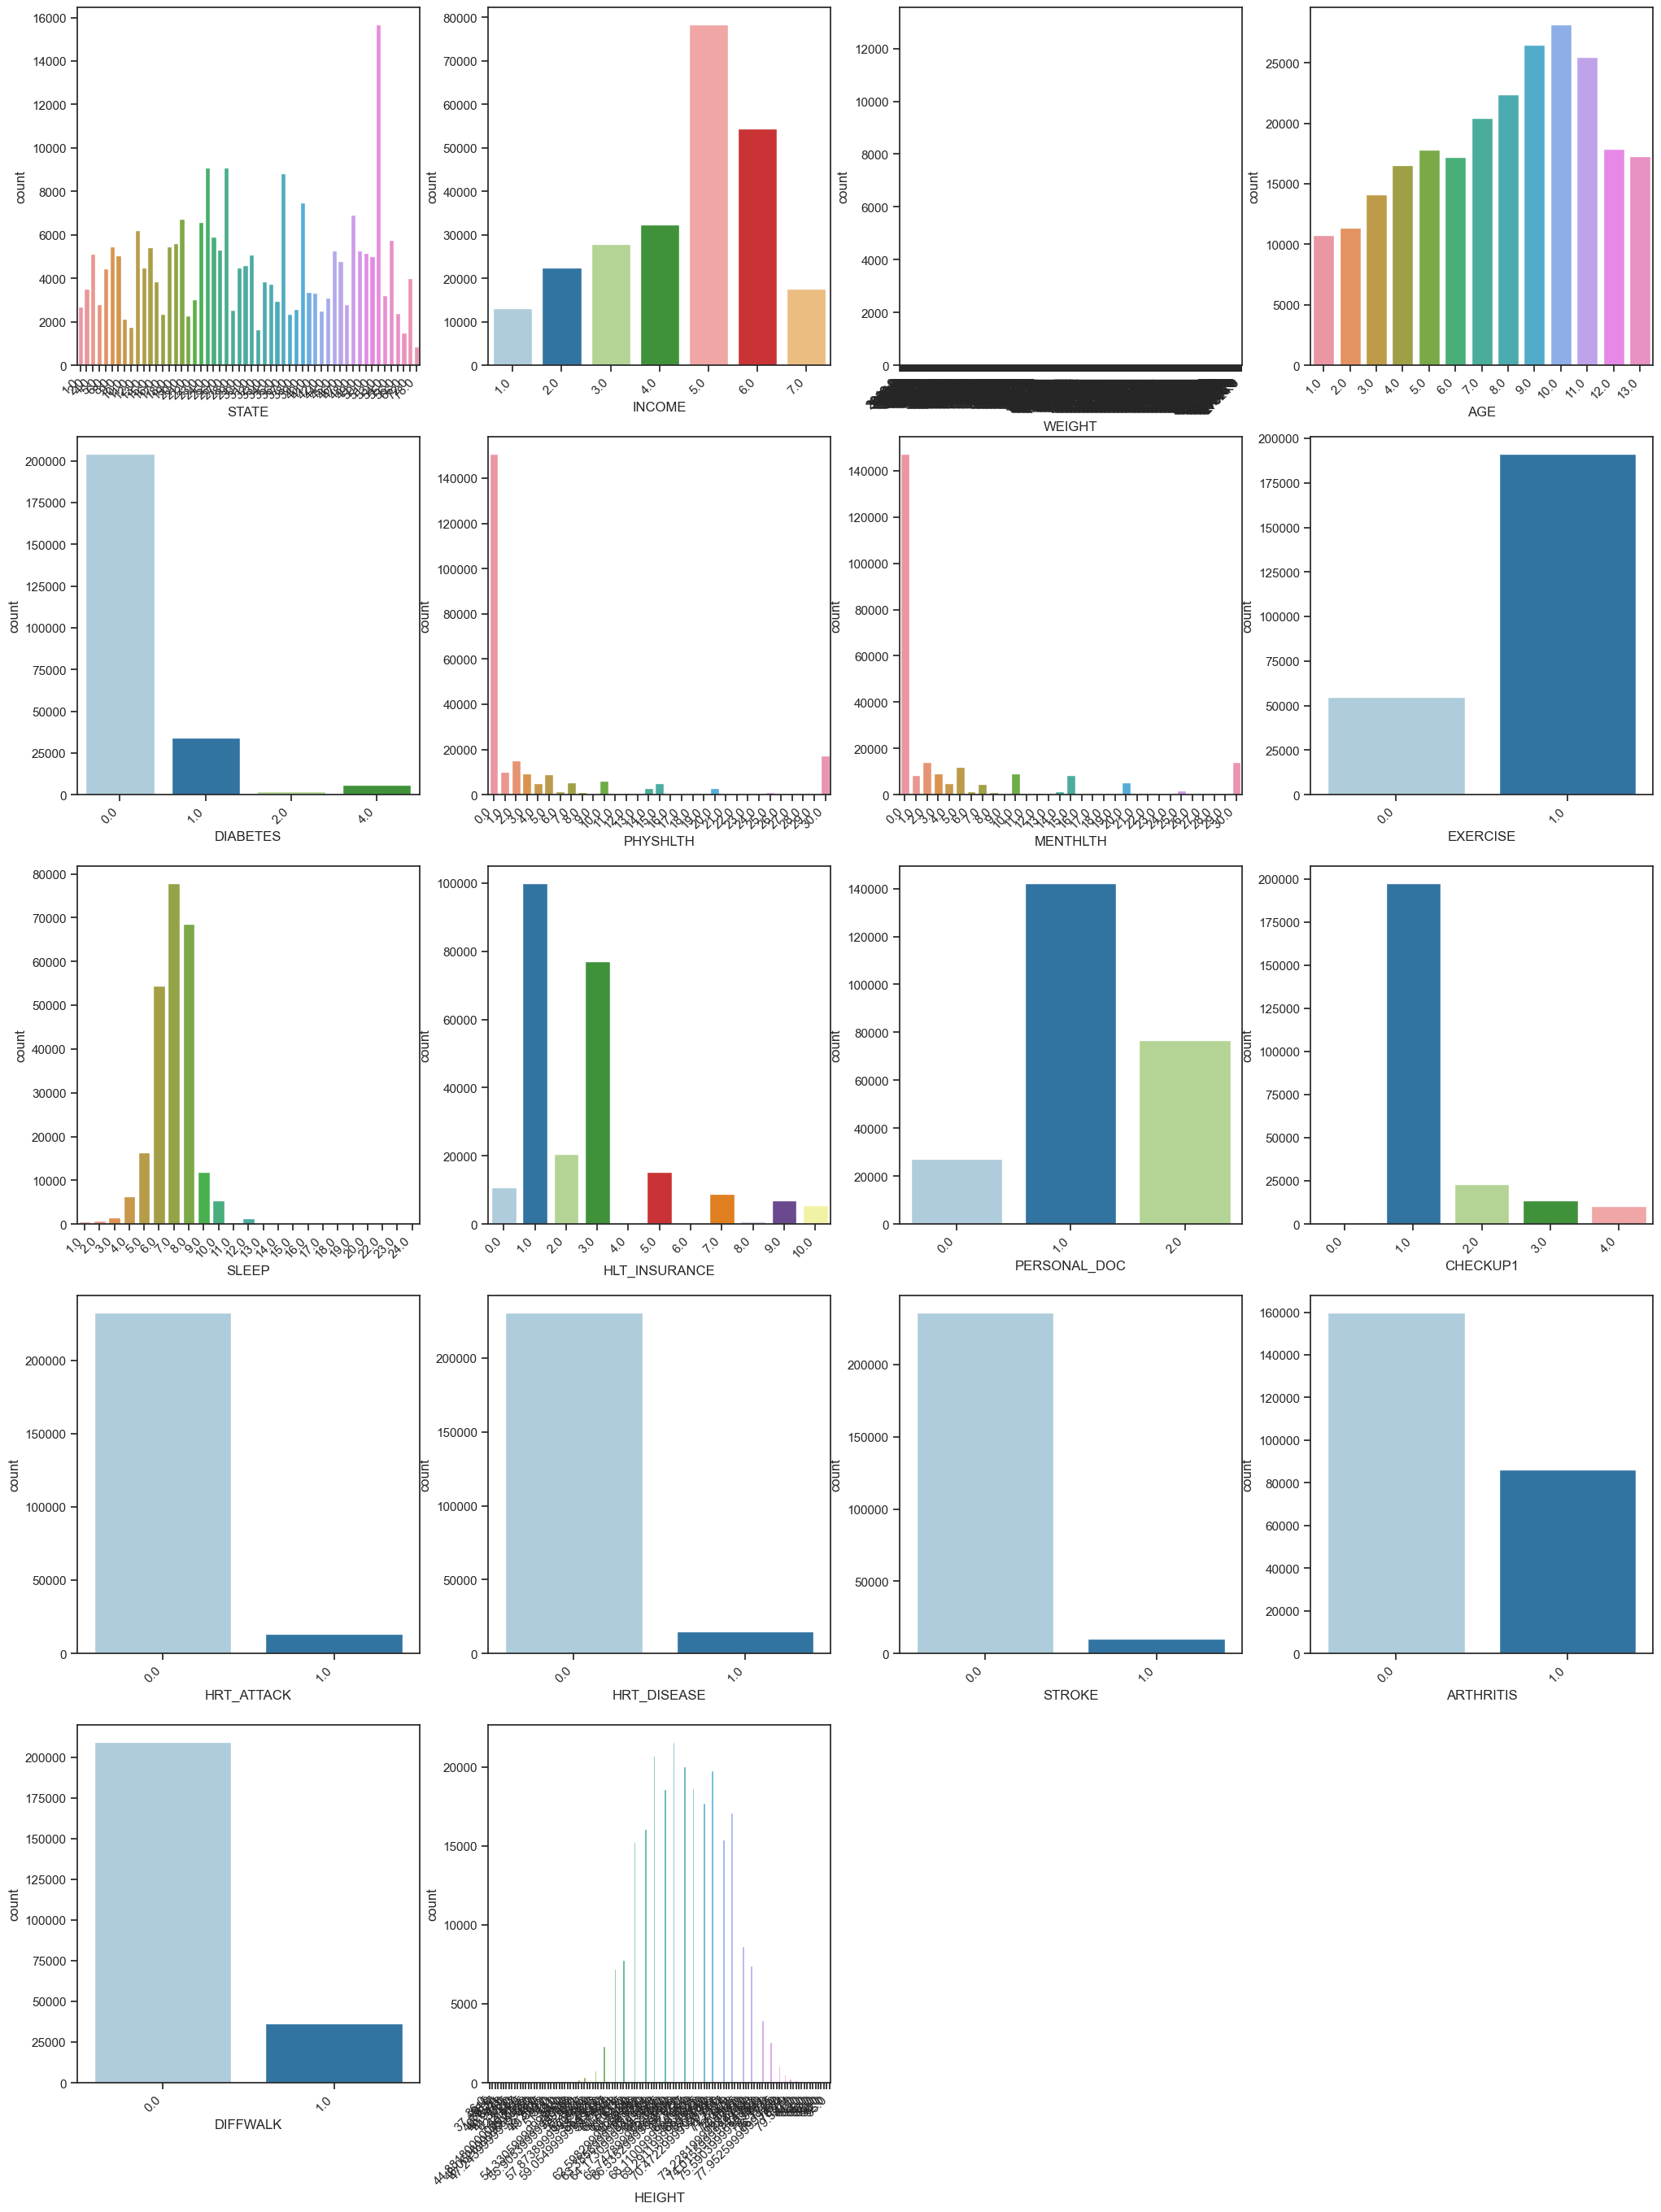

In [32]:
# Univariate visualization of categorical features

def univariate_analysis():
  i = 1
  plt.figure(figsize = (25,40))
  for column in num_col:
      plt.subplot(6,4,i)
      sns.set(palette='Paired')
      sns.set_style("ticks")
      ax = sns.countplot(x = column, data = df)#, hue = 'Stroke')#, color='#221C35') 
      ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
      i +=1

univariate_analysis()

In [33]:
# list of some relevant features that are looks like normally distributed
normal_features = ["WEIGHT", "HEIGHT","INCOME", "SLEEP", "AGE"]

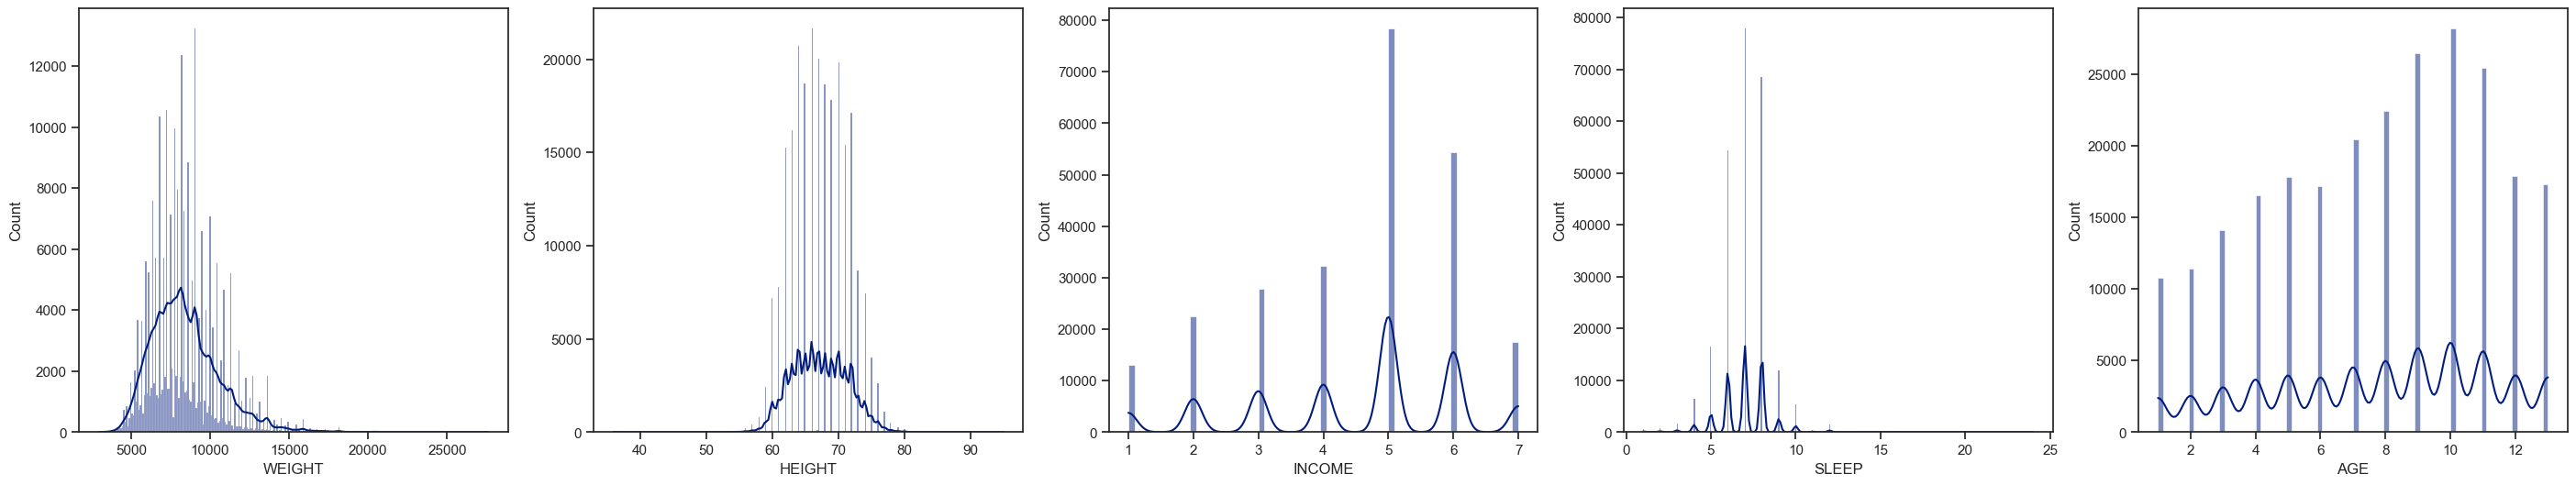

In [35]:
# Univariate visualization of features

def univariate_analysis_hist():
  i=1
  plt.figure(figsize = (35,6))
  for feature in normal_features:
      plt.subplot(1,5,i)
      sns.set(palette='dark')
      sns.set_style("ticks")
      sns.histplot(df[feature],kde=True)
      plt.xlabel(feature)
      plt.ylabel("Count")
      i+=1

univariate_analysis_hist()

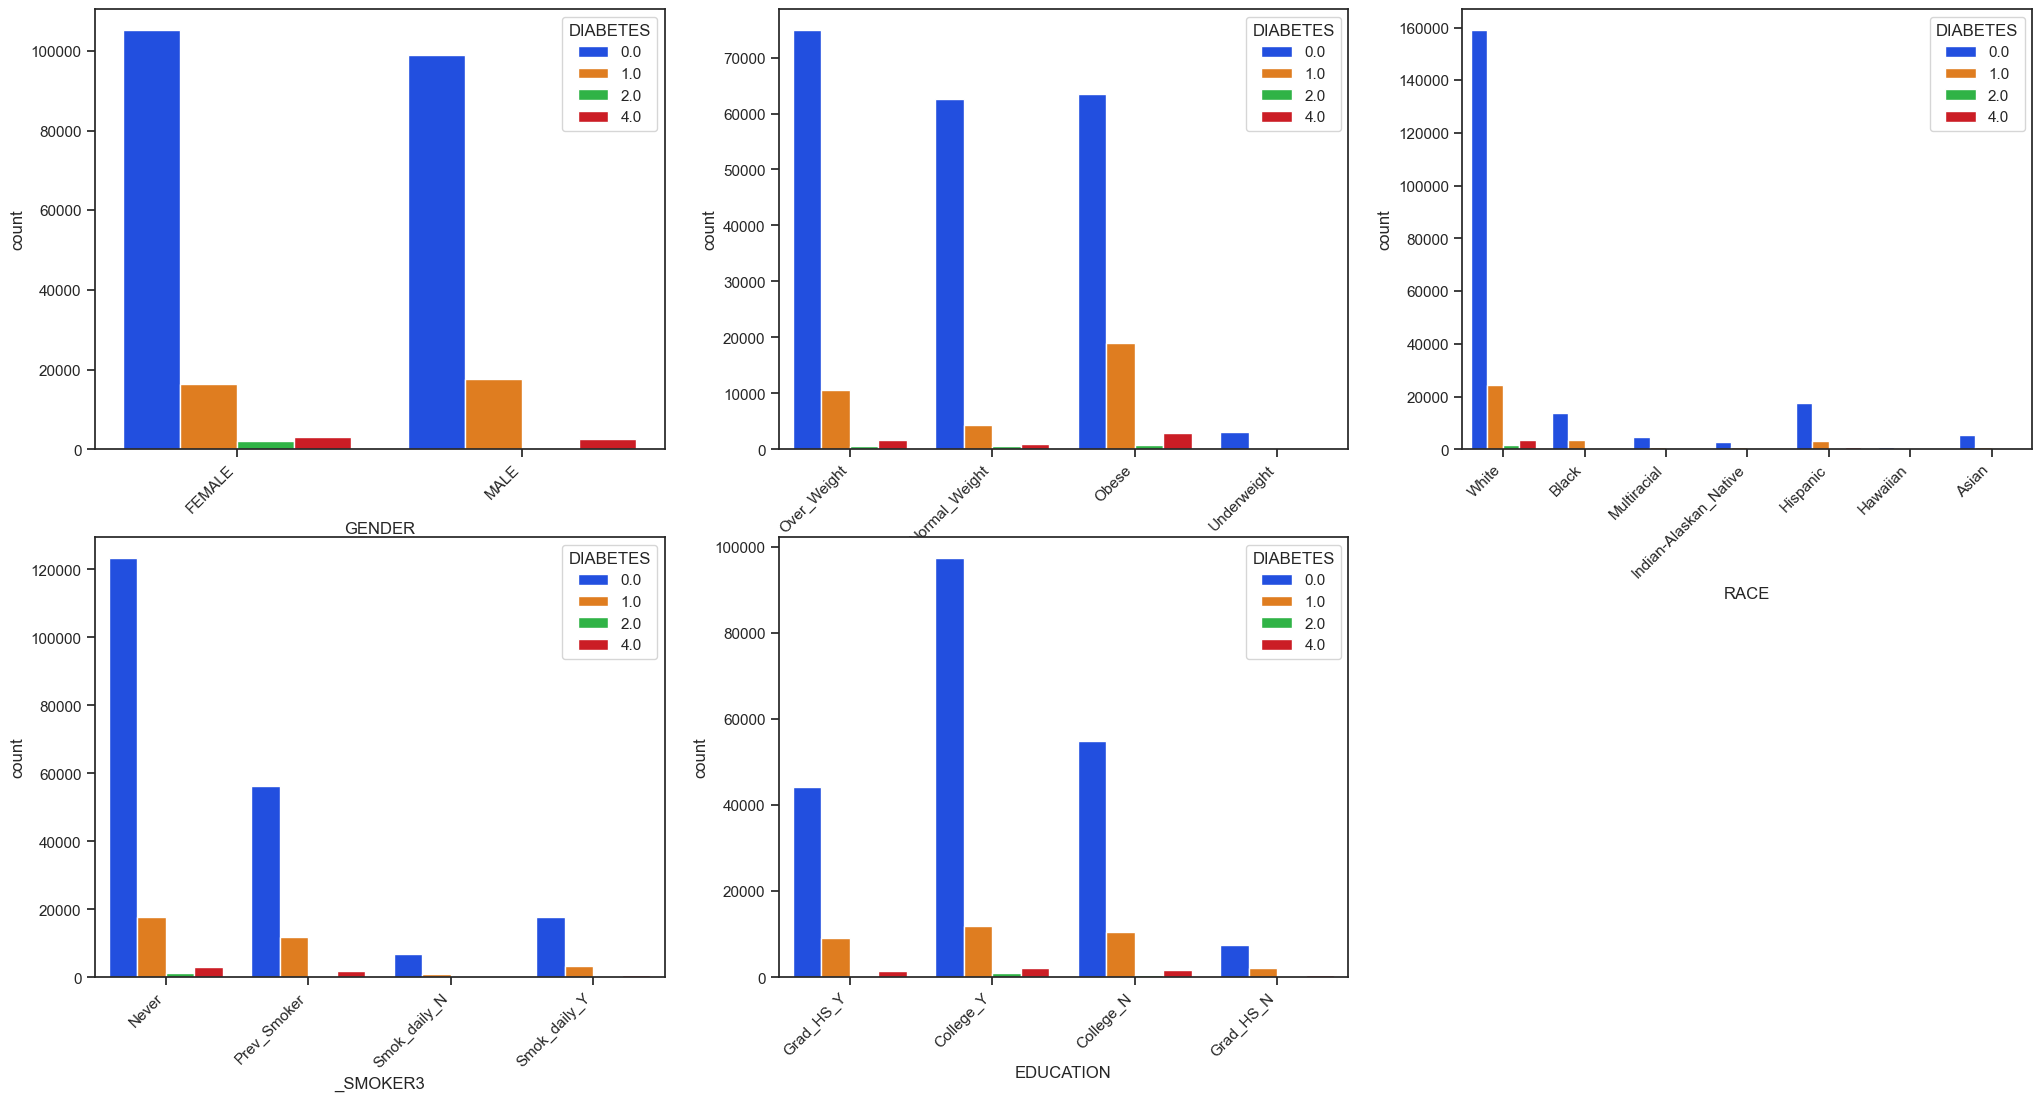

In [37]:
def Bivariate_analysis():
  i = 1
  plt.figure(figsize = (25,40))
  for column in cat_col:
      plt.subplot(6,3,i)
      sns.set(palette='bright')
      sns.set_style("ticks")
      ax = sns.countplot(x = column, data = df, hue = 'DIABETES')
      ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
      i +=1

Bivariate_analysis()

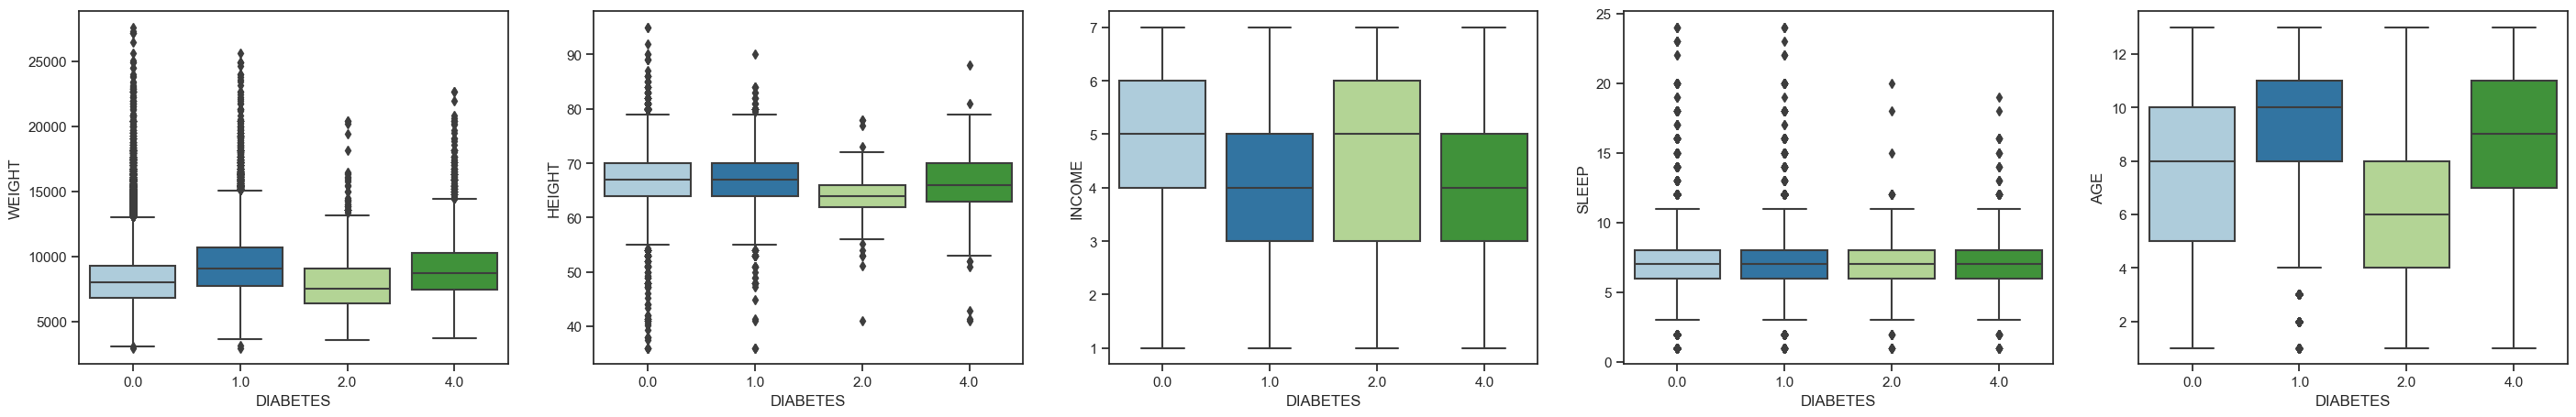

In [39]:
def numeric_features_func(f):
  i=1
  plt.figure(figsize=(35,5))
  sns.set(palette='Paired')
  sns.set_style("ticks")
  for feature in normal_features:
      plt.subplot(1,5,i)
      sns.boxplot(y=df[feature], x = df[f])
      i+=1

numeric_features_func('DIABETES')

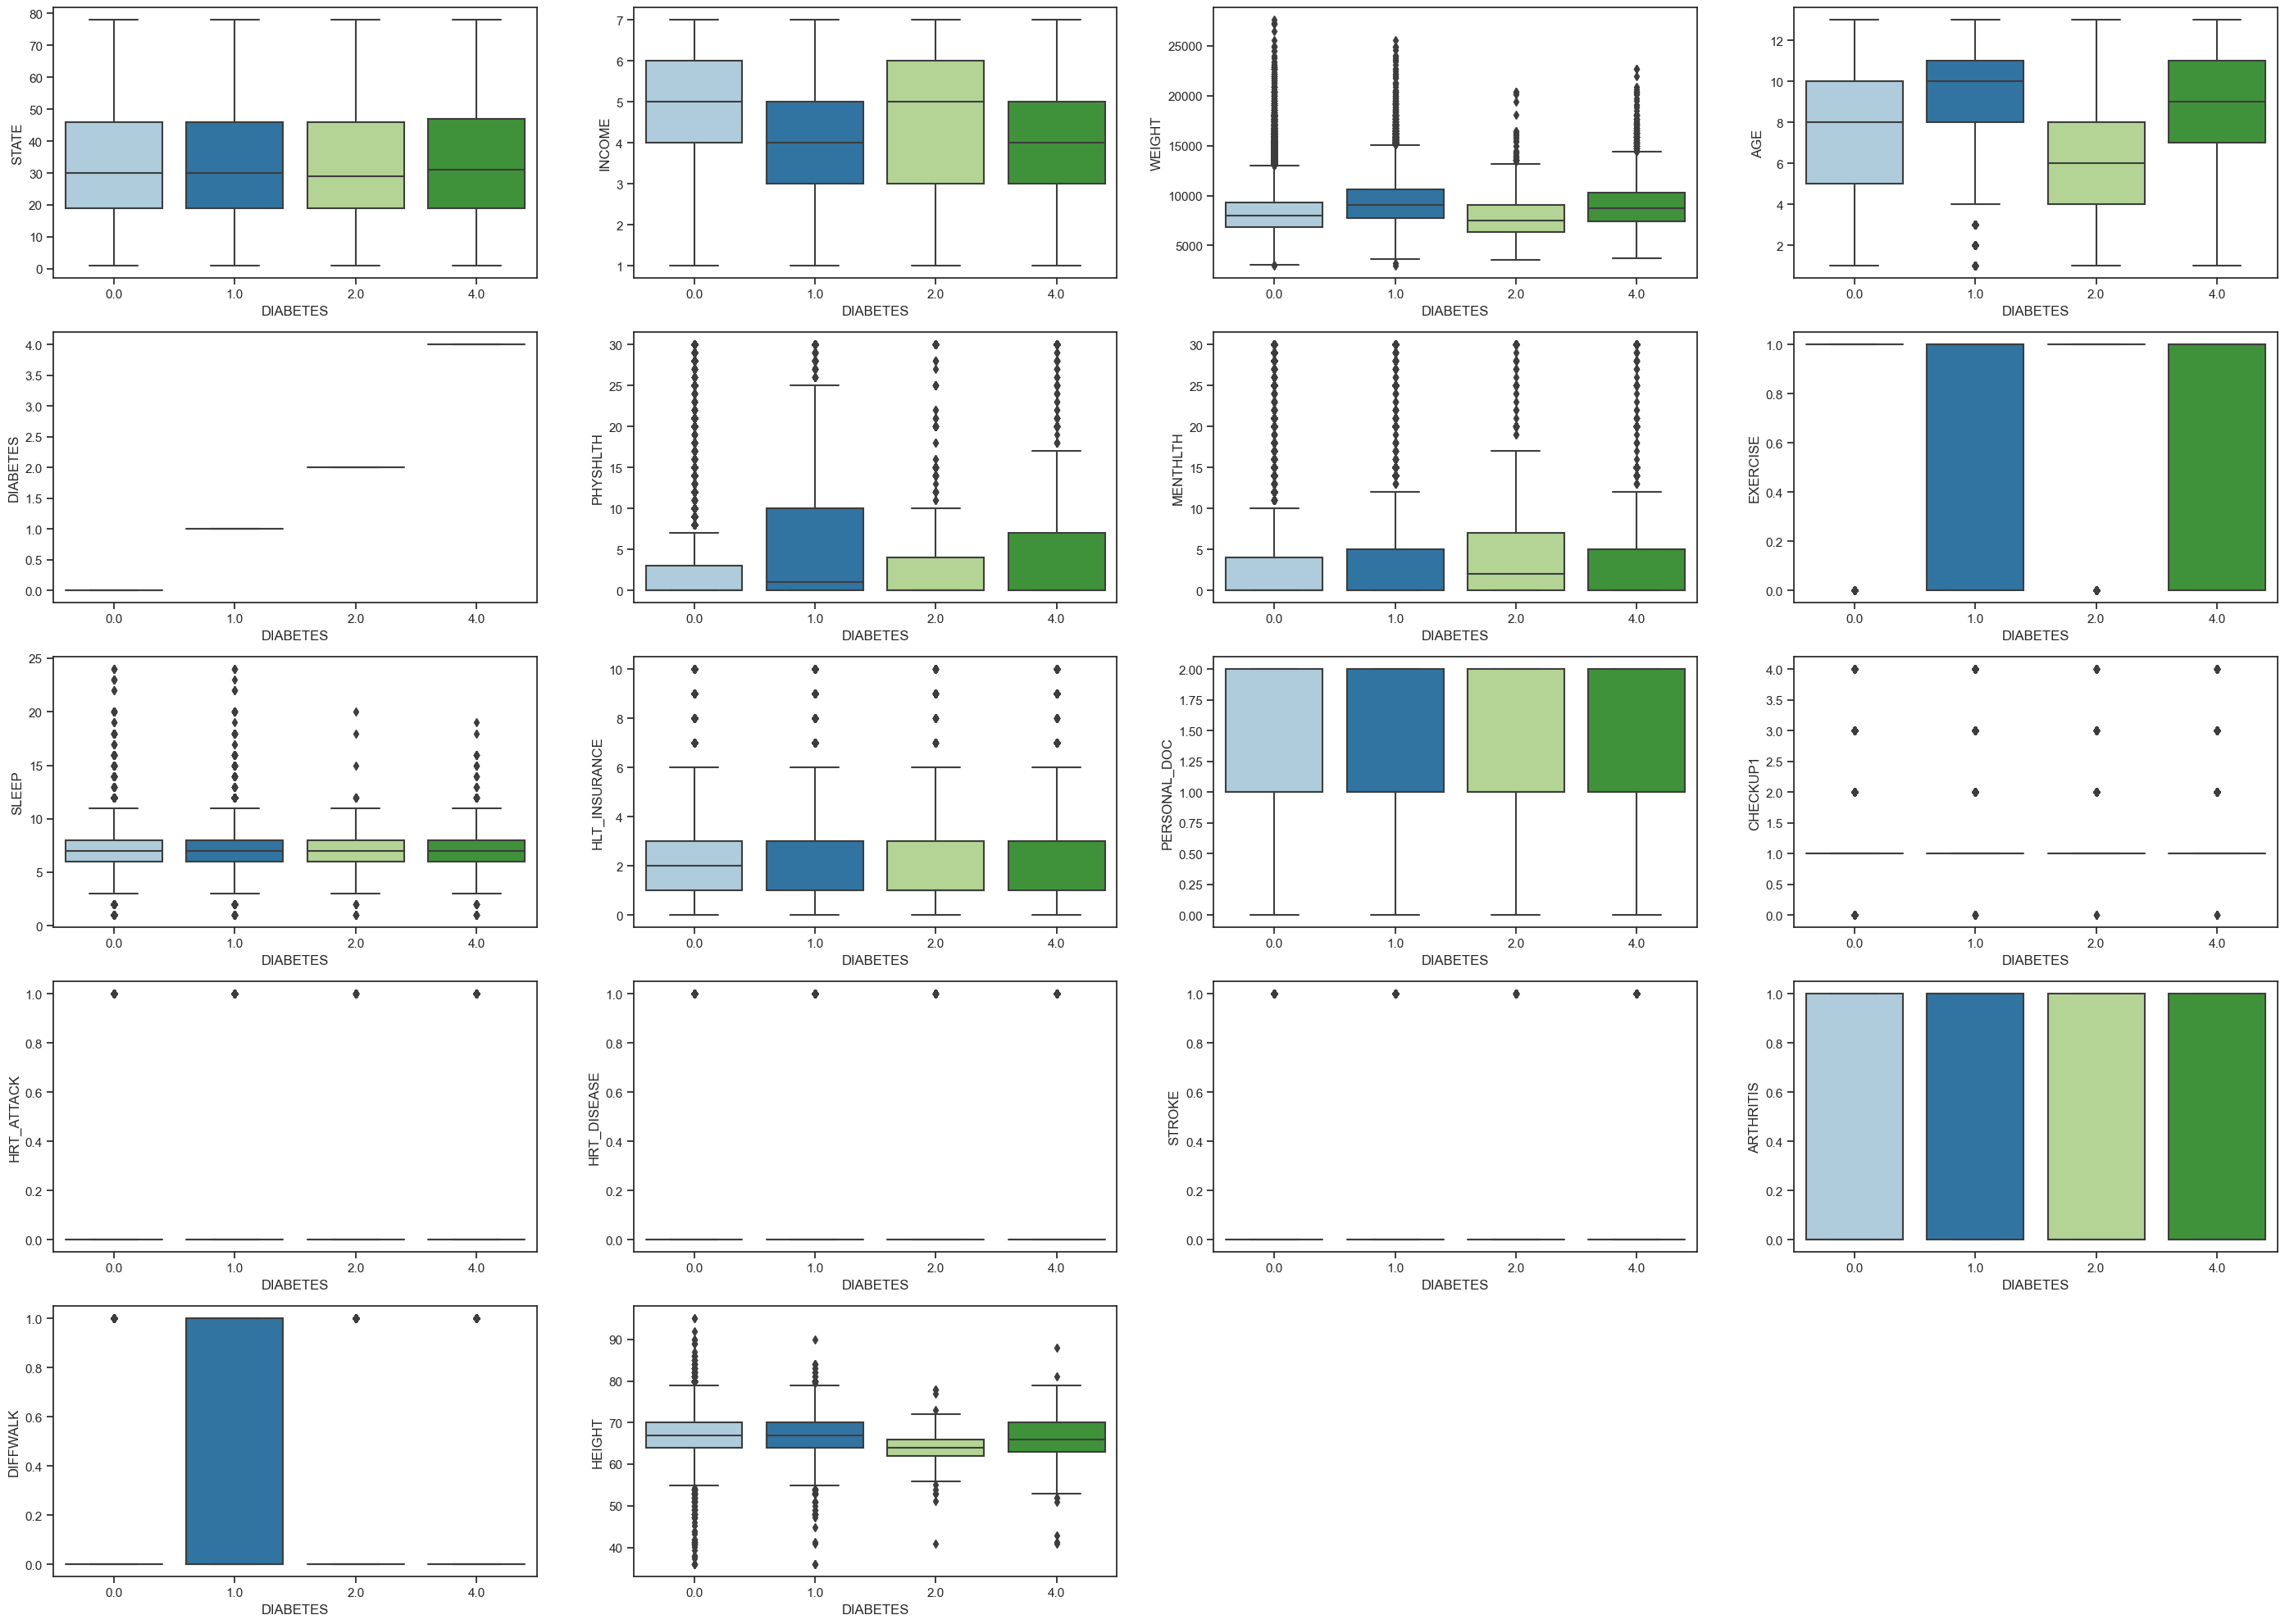

In [41]:
def numeric_features_func(f):
  i=1
  plt.figure(figsize=(35,30))
  sns.set(palette='Paired')
  sns.set_style("ticks")
  for feature in num_col:
      plt.subplot(6,4,i)
      sns.boxplot(y=df[feature], x = df[f])
      i+=1

numeric_features_func('DIABETES')

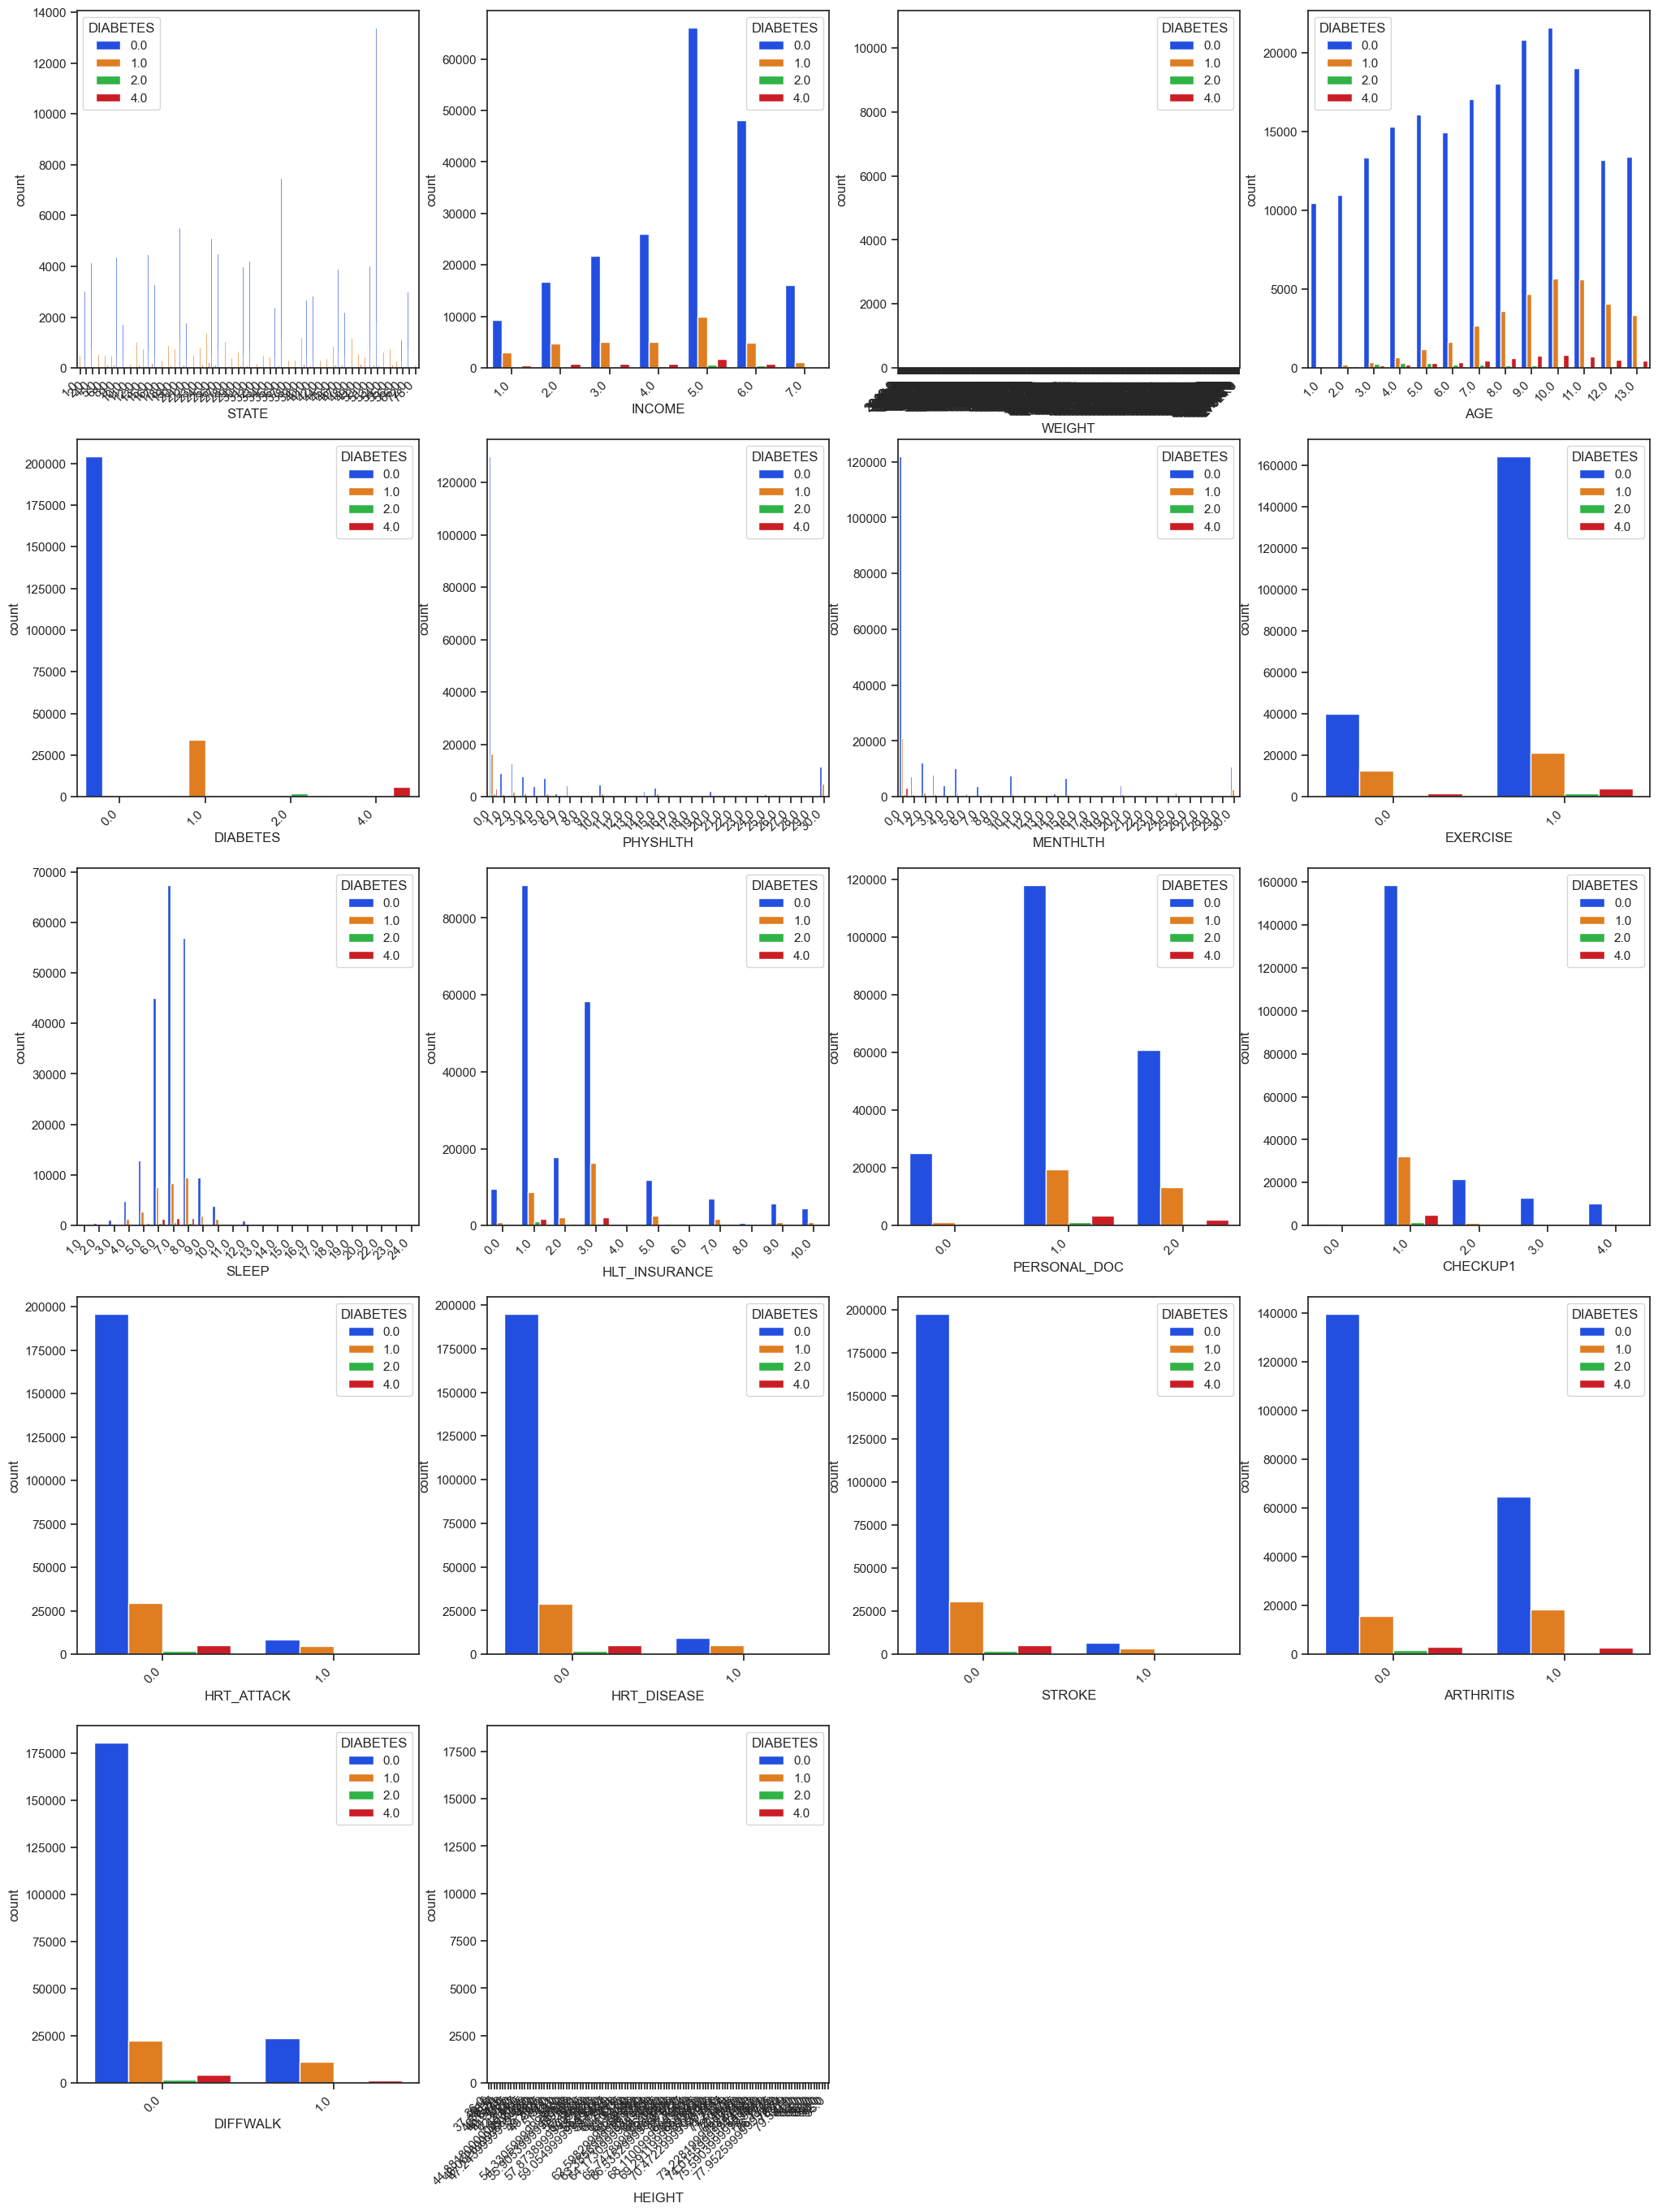

In [43]:
def Bivariate_analysis():
  i = 1
  plt.figure(figsize = (25,40))
  for column in num_col:
      plt.subplot(6,4,i)
      sns.set(palette='bright')
      sns.set_style("ticks")
      ax = sns.countplot(x = column, data = df, hue = 'DIABETES')
      ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
      i +=1

Bivariate_analysis()

In [108]:
data_df = df.copy()

In [109]:
#Substituting the value of pre-diabeteic and diabetes during pregnancy as Diabeteic (1 : Diabetic & 0: Not Diabetic)
Diab_dict = {1: 1,
            2: 1,
            0: 0, 
            4: 1,}
data_df['DIABETIC'] = data_df['DIABETES'].apply(lambda x: Diab_dict[x])

In [110]:
data_df = data_df.drop(columns = ["DIABETES", "ID"])

C:\Users\nikit\AppData\Local\Temp\ipykernel_3444\1769723743.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_df.corr()


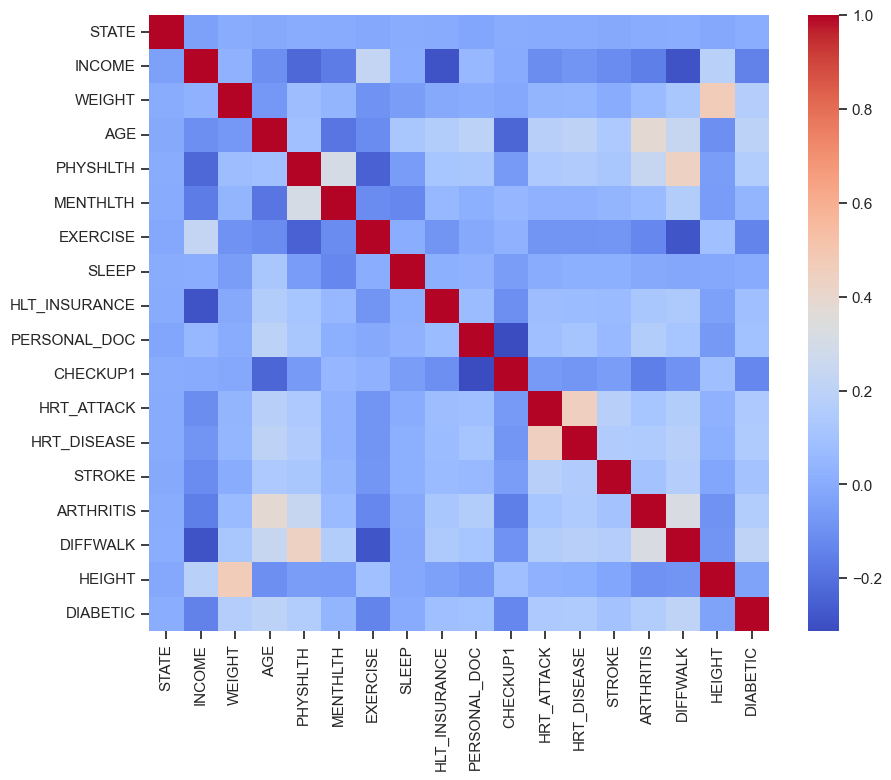

In [111]:
# Calculate correlation matrix
correlation_matrix = data_df.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.show()

In [112]:
data_df = data_df.drop(columns = ["STATE"])

In [113]:
# Convert categorical data to numeric with `pd.get_dummies`
df_dummies = pd.get_dummies(data_df)
df_dummies.head()

,INCOME,WEIGHT,AGE,PHYSHLTH,MENTHLTH,EXERCISE,SLEEP,HLT_INSURANCE,PERSONAL_DOC,CHECKUP1,...,RACE_Multiracial,RACE_White,_SMOKER3_Never,_SMOKER3_Prev_Smoker,_SMOKER3_Smok_daily_N,_SMOKER3_Smok_daily_Y,EDUCATION_College_N,EDUCATION_College_Y,EDUCATION_Grad_HS_N,EDUCATION_Grad_HS_Y
0,3.0,6804.0,13.0,0.0,0.0,0.0,6.0,3.0,2.0,0.0,...,0,1,1,0,0,0,0,0,0,1
1,6.0,6350.0,8.0,2.0,3.0,1.0,5.0,1.0,1.0,1.0,...,0,1,1,0,0,0,0,1,0,0
2,3.0,5398.0,5.0,2.0,0.0,1.0,9.0,7.0,2.0,1.0,...,0,1,1,0,0,0,1,0,0,0
3,5.0,6260.0,13.0,0.0,0.0,1.0,7.0,2.0,1.0,1.0,...,0,0,0,1,0,0,0,1,0,0
4,5.0,7348.0,13.0,0.0,0.0,0.0,8.0,3.0,1.0,1.0,...,0,1,1,0,0,0,0,0,0,1


In [114]:
Y=df_dummies["DIABETIC"]
Y.value_counts()

0    204208
1     41842
Name: DIABETIC, dtype: int64

In [115]:
# Split our preprocessed data into our features and target arrays
y=Y.values.reshape(-1, 1)
X=df_dummies.copy()
X.drop("DIABETIC", axis=1, inplace=True)
X.head()


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [116]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [117]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [118]:
# Fit the model and use .ravel()on the "y_train" data. 
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())

In [119]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [120]:
# Model Evaluation: Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [121]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,49902,1282
Actual 1,9026,1303


Accuracy Score : 0.8324256661193569
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.97      0.91     51184
           1       0.50      0.13      0.20     10329

    accuracy                           0.83     61513
   macro avg       0.68      0.55      0.55     61513
weighted avg       0.79      0.83      0.79     61513



In [122]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
least_important = sorted(zip(rf_model.feature_importances_, X.columns), reverse= False)
importances_sorted

[(0.14527638924523728, 'WEIGHT'),
 (0.10579664000936018, 'HEIGHT'),
 (0.09536415361444452, 'AGE'),
 (0.07814171238841452, 'SLEEP'),
 (0.06296538871790971, 'PHYSHLTH'),
 (0.06270478064572746, 'INCOME'),
 (0.05688577835120077, 'MENTHLTH'),
 (0.04900186444566088, 'HLT_INSURANCE'),
 (0.03325439796270291, 'PERSONAL_DOC'),
 (0.024393917384939783, 'DIFFWALK'),
 (0.021719288022492463, 'ARTHRITIS'),
 (0.019073550822559848, 'BMI_Obese'),
 (0.017470820769796832, '_SMOKER3_Never'),
 (0.017410872212595376, 'CHECKUP1'),
 (0.01733815646529278, 'EXERCISE'),
 (0.016758600361406282, '_SMOKER3_Prev_Smoker'),
 (0.01620553127556397, 'EDUCATION_College_N'),
 (0.01490990829237601, 'EDUCATION_Grad_HS_Y'),
 (0.014907474393205536, 'EDUCATION_College_Y'),
 (0.01304339161088164, 'HRT_DISEASE'),
 (0.012484058805069068, 'RACE_White'),
 (0.01088943912329415, 'HRT_ATTACK'),
 (0.010482282006878157, 'GENDER_MALE'),
 (0.010451985511471992, 'GENDER_FEMALE'),
 (0.00994929640419031, '_SMOKER3_Smok_daily_Y'),
 (0.0097788550

In [123]:
importances_df = pd.DataFrame(importances_sorted[:20])

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

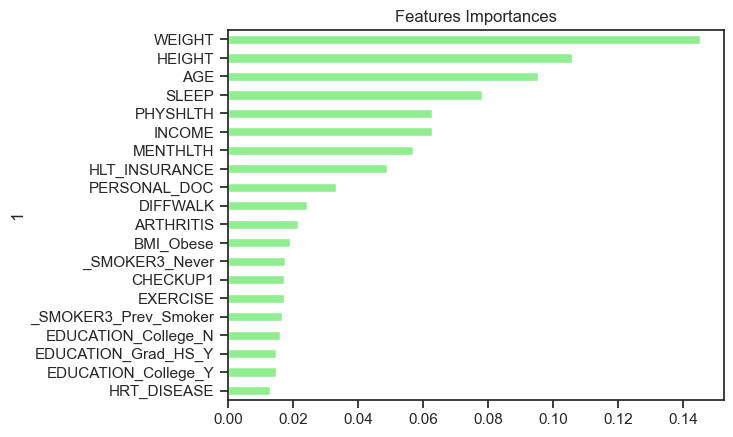

In [124]:
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [125]:
least_important_df = pd.DataFrame(least_important)
least_important_df

,0,1
0,0.001017,BMI_Underweight
1,0.001797,RACE_Hawaiian
2,0.003457,RACE_Indian-Alaskan_Native
3,0.003592,RACE_Asian
4,0.003831,RACE_Multiracial
5,0.005126,_SMOKER3_Smok_daily_N
6,0.005717,BMI_Over_Weight
7,0.006740,EDUCATION_Grad_HS_N
8,0.007209,RACE_Hispanic
9,0.007403,RACE_Black


In [126]:
Y=df_dummies["DIABETIC"]
Y.value_counts()

0    204208
1     41842
Name: DIABETIC, dtype: int64

The dataset is not equally distributed among the two categories: Have Diabetes and Donot have diabetes. Therefore we used **RandomOverSampler** to from the imbalanced-learn library to resample the data

## Predict a Random Forest with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [127]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ros = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_ros_model, y_ros_model = ros.fit_resample(X,y)

In [128]:
# Count the distinct values of the resampled labels data
from collections import Counter

print(Counter(X_ros_model))
print(Counter(y_ros_model))

Counter({'INCOME': 1, 'WEIGHT': 1, 'AGE': 1, 'PHYSHLTH': 1, 'MENTHLTH': 1, 'EXERCISE': 1, 'SLEEP': 1, 'HLT_INSURANCE': 1, 'PERSONAL_DOC': 1, 'CHECKUP1': 1, 'HRT_ATTACK': 1, 'HRT_DISEASE': 1, 'STROKE': 1, 'ARTHRITIS': 1, 'DIFFWALK': 1, 'HEIGHT': 1, 'GENDER_FEMALE': 1, 'GENDER_MALE': 1, 'BMI_Normal_Weight': 1, 'BMI_Obese': 1, 'BMI_Over_Weight': 1, 'BMI_Underweight': 1, 'RACE_Asian': 1, 'RACE_Black': 1, 'RACE_Hawaiian': 1, 'RACE_Hispanic': 1, 'RACE_Indian-Alaskan_Native': 1, 'RACE_Multiracial': 1, 'RACE_White': 1, '_SMOKER3_Never': 1, '_SMOKER3_Prev_Smoker': 1, '_SMOKER3_Smok_daily_N': 1, '_SMOKER3_Smok_daily_Y': 1, 'EDUCATION_College_N': 1, 'EDUCATION_College_Y': 1, 'EDUCATION_Grad_HS_N': 1, 'EDUCATION_Grad_HS_Y': 1})
Counter({0: 204208, 1: 204208})


In [129]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros_model, y_ros_model, random_state=1)

In [130]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train_ros)

# Scale the data
X_train_scaled_ros = X_scaler.transform(X_train_ros)
X_test_scaled_ros = X_scaler.transform(X_test_ros)

### Step 2: Use the `Random Forest` classifier and the resampled data to fit the model and make predictions.

In [131]:
# Create the random forest classifier instance
rf_model_ros = RandomForestClassifier(n_estimators=500, random_state=78)

In [132]:
# Fit the model and use .ravel()on the "y_train" data. 
rf_model_ros = rf_model_ros.fit(X_train_scaled_ros, y_train_ros.ravel())

In [133]:
# Making predictions using the testing data
predictions_ros = rf_model_ros.predict(X_test_scaled_ros)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [80]:
# Model Evaluation: Calculating the confusion matrix
cm_ros = confusion_matrix(y_test_ros, predictions_ros)
cm_df_ros = pd.DataFrame(
    cm_ros, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score_ros = accuracy_score(y_test_ros, predictions_ros)

In [81]:
print("Confusion Matrix")
display(cm_df_ros)
print(f"Accuracy Score : {acc_score_ros}")
print("Classification Report")
print(classification_report(y_test_ros, predictions_ros))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,46372,4774
Actual 1,714,50244


Accuracy Score : 0.9462508814542036
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     51146
           1       0.91      0.99      0.95     50958

    accuracy                           0.95    102104
   macro avg       0.95      0.95      0.95    102104
weighted avg       0.95      0.95      0.95    102104

